In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import  davies_bouldin_score


In [5]:
df = pd.read_csv('df.csv')
df.drop(columns=['cluster', 'Unnamed: 0'], inplace=True)
df

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID
0,2.332504,-0.574009,1.149919,-0.560178,-0.075082,7.216450e-16,0.995266,0.232127,2019,10,2.0
1,-0.670114,-0.574009,-0.858486,-0.560178,0.202804,7.216450e-16,-0.609054,-0.776052,2019,10,2.0
2,1.123258,-0.574009,1.867206,-0.958696,1.592234,7.216450e-16,2.000382,2.111681,2019,10,2.0
3,-1.172259,1.675972,-1.288859,-0.958696,-1.310131,7.216450e-16,-1.565847,-1.132929,2019,10,2.0
4,-0.875071,1.675972,-0.428114,-0.958696,-1.310131,7.216450e-16,-0.841003,-0.169360,2019,10,2.0
...,...,...,...,...,...,...,...,...,...,...,...
4283208,0.646525,-0.542339,0.427844,-0.896755,0.713413,7.771561e-16,0.519474,-0.144702,2021,4,2.0
4283209,-0.661957,1.760627,-0.302875,-0.896755,-1.341129,7.771561e-16,-0.752683,0.014671,2021,4,2.0
4283210,1.137206,-0.542339,0.427844,-0.102768,0.867890,7.771561e-16,0.815324,-0.304075,2021,5,2.0
4283211,0.492586,1.760627,0.573988,-0.102768,-1.341129,7.771561e-16,0.233485,0.564000,2021,5,2.0


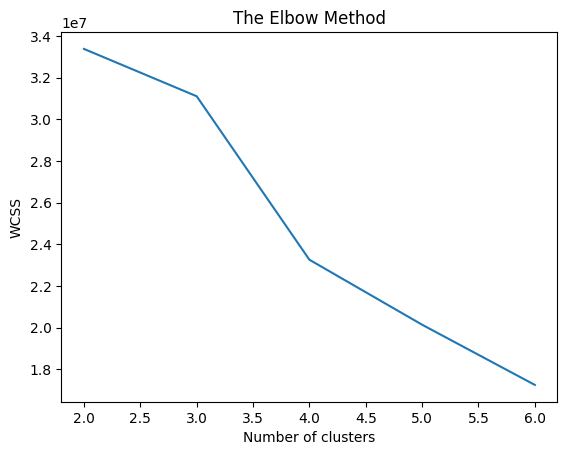

In [6]:
df_kmeans = df.copy()
wcss = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_kmeans)
df_kmeans['kmeans_cluster'] = kmeans_labels
df_kmeans

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID,kmeans_cluster
0,2.332504,-0.574009,1.149919,-0.560178,-0.075082,7.216450e-16,0.995266,0.232127,2019,10,2.0,2
1,-0.670114,-0.574009,-0.858486,-0.560178,0.202804,7.216450e-16,-0.609054,-0.776052,2019,10,2.0,2
2,1.123258,-0.574009,1.867206,-0.958696,1.592234,7.216450e-16,2.000382,2.111681,2019,10,2.0,2
3,-1.172259,1.675972,-1.288859,-0.958696,-1.310131,7.216450e-16,-1.565847,-1.132929,2019,10,2.0,1
4,-0.875071,1.675972,-0.428114,-0.958696,-1.310131,7.216450e-16,-0.841003,-0.169360,2019,10,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4283208,0.646525,-0.542339,0.427844,-0.896755,0.713413,7.771561e-16,0.519474,-0.144702,2021,4,2.0,3
4283209,-0.661957,1.760627,-0.302875,-0.896755,-1.341129,7.771561e-16,-0.752683,0.014671,2021,4,2.0,0
4283210,1.137206,-0.542339,0.427844,-0.102768,0.867890,7.771561e-16,0.815324,-0.304075,2021,5,2.0,3
4283211,0.492586,1.760627,0.573988,-0.102768,-1.341129,7.771561e-16,0.233485,0.564000,2021,5,2.0,0


In [8]:
features = df_kmeans.columns
cluster_description = df_kmeans.groupby('kmeans_cluster')[features].mean()
cluster_description


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID,kmeans_cluster
kmeans_cluster,,,,,,,,,,,,
0,-0.551884,0.102420,-0.593989,-0.000607,-0.306765,8.050372e-16,-0.600152,-0.567539,2020.497740,1.499872,1.650684,0.0
1,-0.089914,1.673879,-0.079945,-0.019128,-1.309953,7.216450e-16,-0.483596,-0.066991,2019.000000,10.999994,1.634670,1.0
2,0.030833,-0.574000,0.027415,0.006559,0.449204,7.216450e-16,0.165833,0.022972,2019.000000,11.000001,1.634344,2.0
3,1.036908,-0.192433,1.116017,0.001141,0.576366,8.050983e-16,1.127597,1.066323,2020.496639,1.518456,1.659743,3.0


In [9]:
df_minibatch = df.copy()
minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42)
minibatch_kmeans_labels = minibatch_kmeans.fit_predict(df_minibatch)
df_minibatch['minibatch_kmeans_cluster'] = minibatch_kmeans_labels
df_minibatch

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID,minibatch_kmeans_cluster
0,2.332504,-0.574009,1.149919,-0.560178,-0.075082,7.216450e-16,0.995266,0.232127,2019,10,2.0,3
1,-0.670114,-0.574009,-0.858486,-0.560178,0.202804,7.216450e-16,-0.609054,-0.776052,2019,10,2.0,0
2,1.123258,-0.574009,1.867206,-0.958696,1.592234,7.216450e-16,2.000382,2.111681,2019,10,2.0,3
3,-1.172259,1.675972,-1.288859,-0.958696,-1.310131,7.216450e-16,-1.565847,-1.132929,2019,10,2.0,0
4,-0.875071,1.675972,-0.428114,-0.958696,-1.310131,7.216450e-16,-0.841003,-0.169360,2019,10,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4283208,0.646525,-0.542339,0.427844,-0.896755,0.713413,7.771561e-16,0.519474,-0.144702,2021,4,2.0,2
4283209,-0.661957,1.760627,-0.302875,-0.896755,-1.341129,7.771561e-16,-0.752683,0.014671,2021,4,2.0,1
4283210,1.137206,-0.542339,0.427844,-0.102768,0.867890,7.771561e-16,0.815324,-0.304075,2021,5,2.0,2
4283211,0.492586,1.760627,0.573988,-0.102768,-1.341129,7.771561e-16,0.233485,0.564000,2021,5,2.0,1


In [10]:
features = df_minibatch.columns
cluster_description = df_minibatch.groupby('minibatch_kmeans_cluster')[features].mean()
cluster_description


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID,minibatch_kmeans_cluster
minibatch_kmeans_cluster,,,,,,,,,,,,
0,-0.544455,0.125886,-0.632152,-0.001856,-0.342615,7.216450e-16,-0.642466,-0.603879,2019.000000,10.999998,1.630993,0.0
1,-0.549961,0.100208,-0.591825,-0.000649,-0.303897,8.050351e-16,-0.597432,-0.565332,2020.497776,1.499906,1.650688,1.0
2,1.042433,-0.189941,1.121784,0.001230,0.576026,8.051025e-16,1.132411,1.071567,2020.496563,1.518499,1.659786,2.0
3,0.903299,-0.208856,1.048796,0.003080,0.568429,7.216450e-16,1.065908,1.001889,2019.000000,11.000002,1.640126,3.0


In [11]:
df_gmm = df.copy()
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_gmm)
df_gmm['gmm_cluster'] = gmm_labels
df_gmm

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID,gmm_cluster
0,2.332504,-0.574009,1.149919,-0.560178,-0.075082,7.216450e-16,0.995266,0.232127,2019,10,2.0,3
1,-0.670114,-0.574009,-0.858486,-0.560178,0.202804,7.216450e-16,-0.609054,-0.776052,2019,10,2.0,3
2,1.123258,-0.574009,1.867206,-0.958696,1.592234,7.216450e-16,2.000382,2.111681,2019,10,2.0,3
3,-1.172259,1.675972,-1.288859,-0.958696,-1.310131,7.216450e-16,-1.565847,-1.132929,2019,10,2.0,3
4,-0.875071,1.675972,-0.428114,-0.958696,-1.310131,7.216450e-16,-0.841003,-0.169360,2019,10,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4283208,0.646525,-0.542339,0.427844,-0.896755,0.713413,7.771561e-16,0.519474,-0.144702,2021,4,2.0,3
4283209,-0.661957,1.760627,-0.302875,-0.896755,-1.341129,7.771561e-16,-0.752683,0.014671,2021,4,2.0,0
4283210,1.137206,-0.542339,0.427844,-0.102768,0.867890,7.771561e-16,0.815324,-0.304075,2021,5,2.0,3
4283211,0.492586,1.760627,0.573988,-0.102768,-1.341129,7.771561e-16,0.233485,0.564000,2021,5,2.0,3


In [12]:
features = df_gmm.columns
cluster_description = df_gmm.groupby('gmm_cluster')[features].mean()
cluster_description


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID,gmm_cluster
gmm_cluster,,,,,,,,,,,,
0,-0.163858,-0.007859,-0.155148,-0.000793,-0.052958,8.051744e-16,-0.148191,-0.119182,2020.495267,1.505317,1.653929,0.0
1,-0.073616,1.709411,-0.061091,-0.019916,-1.310131,7.216450e-16,-0.467725,-0.046325,2019.000000,11.000000,1.635157,1.0
2,0.024367,-0.574009,0.019759,0.007595,0.439813,7.216450e-16,0.155614,0.015397,2019.000000,11.000000,1.633771,2.0
3,1.801388,0.084598,1.707444,0.004834,0.583522,8.030399e-16,1.634397,1.309818,2020.506965,1.602085,1.654344,3.0


In [13]:
davies_bouldin_kmeans = davies_bouldin_score(df_kmeans, kmeans_labels)
davies_bouldin_kmeans

1.1907134215827064

/home/user/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


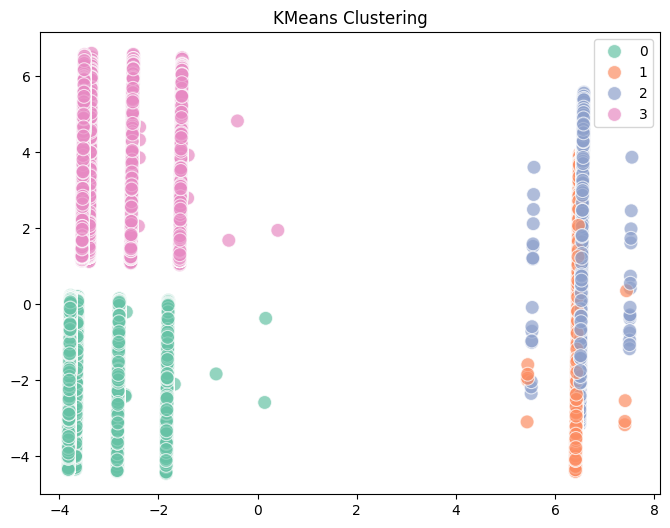

In [14]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_kmeans)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette="Set2", s=100, alpha=0.7)
plt.title('KMeans Clustering')
plt.show()

In [15]:
davies_bouldin_minibatch = davies_bouldin_score(df_minibatch, minibatch_kmeans_labels)
davies_bouldin_minibatch

1.0890266734029885

/home/user/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


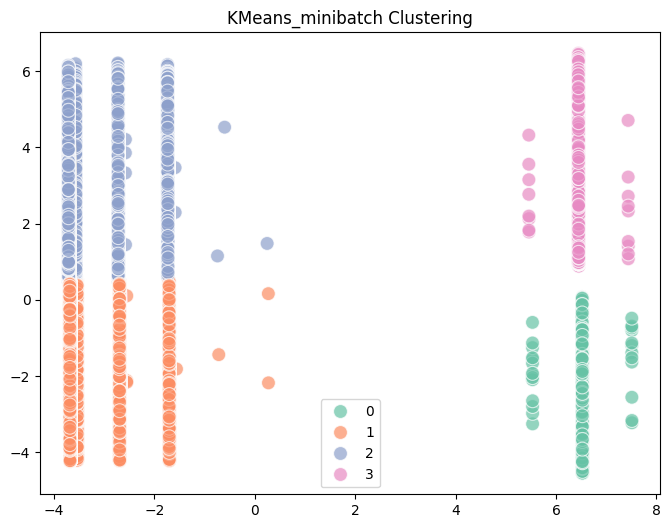

In [16]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_minibatch)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=minibatch_kmeans_labels, palette="Set2", s=100, alpha=0.7)
plt.title('KMeans_minibatch Clustering')
plt.show()

In [17]:
davies_bouldin_gmm = davies_bouldin_score(df_gmm, gmm_labels)
davies_bouldin_gmm

1.2753051004848017

/home/user/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


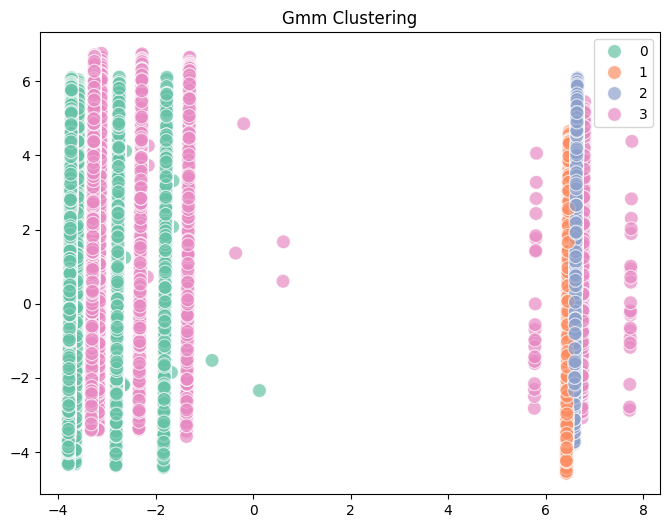

In [18]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_gmm)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=gmm_labels, palette="Set2", s=100, alpha=0.7)
plt.title('Gmm Clustering')
plt.show()



In [19]:
cluster_characteristics = df_minibatch.groupby('minibatch_kmeans_cluster').mean()
cluster_characteristics
    

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID
minibatch_kmeans_cluster,,,,,,,,,,,
0,-0.544455,0.125886,-0.632152,-0.001856,-0.342615,7.216450e-16,-0.642466,-0.603879,2019.000000,10.999998,1.630993
1,-0.549961,0.100208,-0.591825,-0.000649,-0.303897,8.050351e-16,-0.597432,-0.565332,2020.497776,1.499906,1.650688
2,1.042433,-0.189941,1.121784,0.001230,0.576026,8.051025e-16,1.132411,1.071567,2020.496563,1.518499,1.659786
3,0.903299,-0.208856,1.048796,0.003080,0.568429,7.216450e-16,1.065908,1.001889,2019.000000,11.000002,1.640126


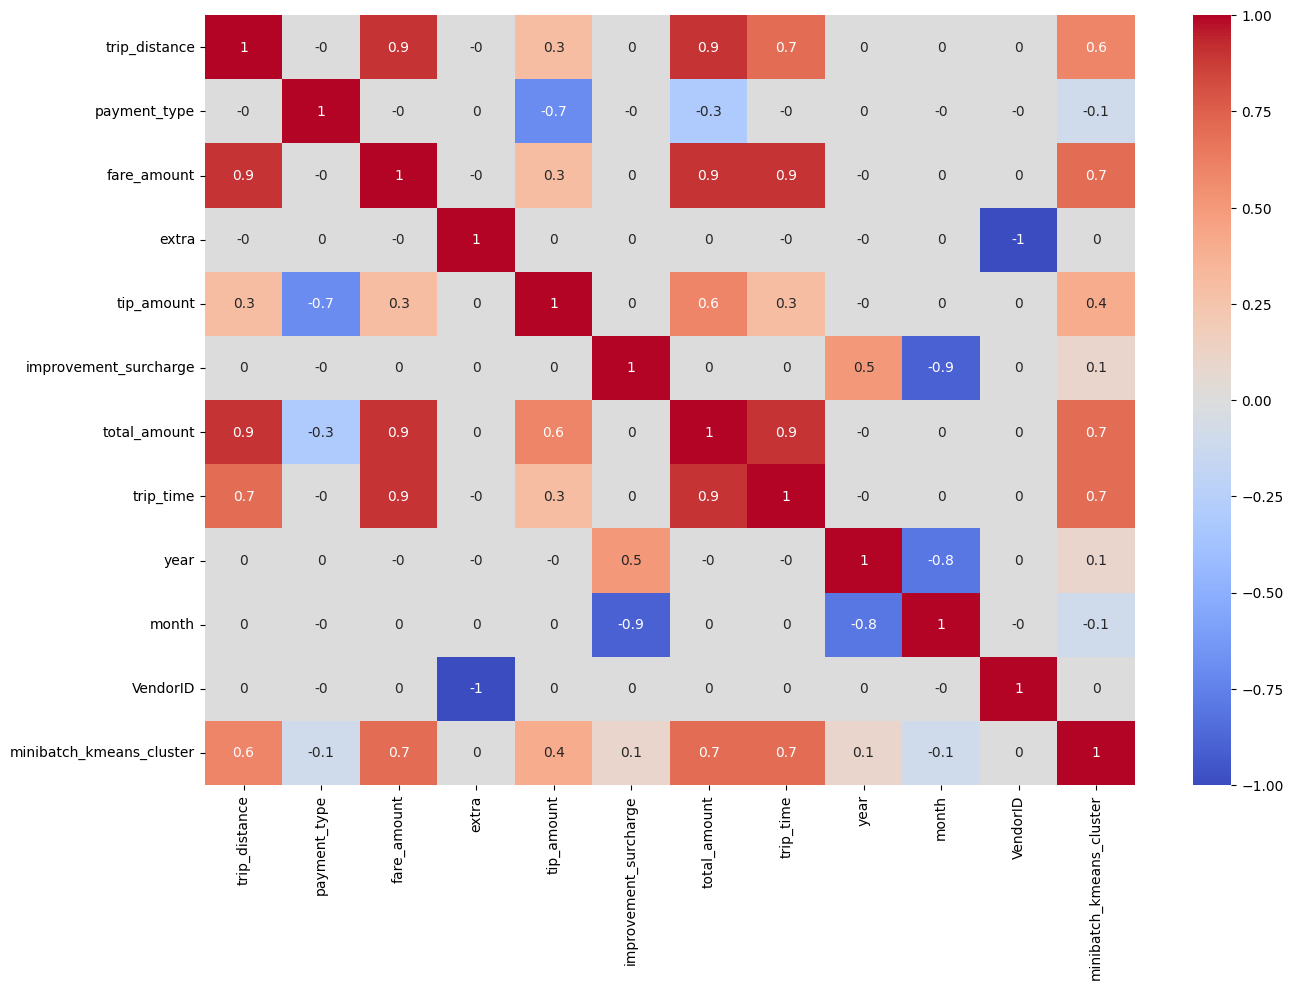

In [20]:
plt.figure(figsize=(15, 10))
correlation = round(df_minibatch.corr(), 1)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [31]:
df_minibatch.to_csv('data_w_clusters.csv')